### Importing dependencies

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs
import requests
import seaborn as sb

In [34]:
page = requests.get("https://www.kicktipp.com/f1-2022-namibia/overview")

In [35]:
soup = bs(page.content, 'html.parser')



In [36]:
table = soup.find('table', id='ranking')

In [37]:
headers = []
for i in table.find_all('th'):
 title = i.text
 headers.append(title)

In [38]:
print(headers)

[' Pos', 'Name', 'Ba', 'Sa', 'Au', 'Em', 'Mi', 'Sp', 'Mo', 'As', 'Ca', 'Gr', 'Au', 'Fr', 'Hu', 'Be', 'Ne', 'It', 'Si', 'Ja', 'US', 'Me', 'Br', 'Ab', 'B', 'W', ' T']


In [39]:
df = pd.DataFrame(columns = headers)
df

,Pos,Name,Ba,Sa,Au,Em,Mi,Sp,Mo,As,...,It,Si,Ja,US,Me,Br,Ab,B,W,T


In [40]:
# Create a for loop to fill mydata
for j in table.find_all('tr')[1:]:
 row_data = j.find_all('td')
 row = [i.text for i in row_data]
 length = len(df)
 df.loc[length] = row


In [41]:
df.columns = ['Pos','Name','Ba','Sa','Au','Em','Mi', 'Sp', 'Mo','As','Ca','Gr','At','Fr','Hu','Be','Ne','It','Si','Ja','US','Me','Br','Ab','B','W','T']
df

,Pos,Name,Ba,Sa,Au,Em,Mi,Sp,Mo,As,...,It,Si,Ja,US,Me,Br,Ab,B,W,T
0,1,Basti,9,16,20,20,16,21,27,22,...,24,19,27,20,29,22,13,4,2.50,445
1,2,Nick,9,18,15,19,22,23,15,13,...,29,13,28,23,28,16,18,4,0.83,432
2,3,Matthias,8,17,22,25,14,25,25,17,...,17,16,24,20,18,22,21,4,2.00,428
3,4,Eva,10,23,23,22,23,16,19,8,...,29,13,27,20,19,9,14,0,1.00,420
4,5,Brent,9,12,20,12,13,19,27,15,...,20,10,28,26,24,9,18,4,1.33,409
5,6,alexis,6,18,14,17,23,16,14,6,...,32,16,28,25,22,9,16,8,1.50,399
6,7,Em,7,24,20,7,19,19,19,16,...,16,22,27,30,15,13,35,8,2.17,389
7,8,Laura,2,11,21,19,31,26,11,9,...,28,8,25,6,21,9,19,4,1.00,389
8,9,Lardu,10,19,13,19,19,26,19,23,...,20,8,27,18,8,19,23,4,1.00,382
9,10,Shaun,10,9,17,9,21,9,17,12,...,20,12,22,24,27,15,21,4,,371


In [42]:
races = []
for col in df.columns:
    races.append(col)
    
races.remove('Pos')
races.remove('Name')
races.remove('W')
races.remove('T')
races.remove('B')
print(races)


['Ba', 'Sa', 'Au', 'Em', 'Mi', 'Sp', 'Mo', 'As', 'Ca', 'Gr', 'At', 'Fr', 'Hu', 'Be', 'Ne', 'It', 'Si', 'Ja', 'US', 'Me', 'Br', 'Ab']


In [43]:
df.to_csv('kicktippdata.csv', index=False)
nameList = df['Name'].tolist()

In [44]:
def scoreList(name):
    nameScore = []
    
    for race in races:
        raceScore = df.at[nameList.index(name),race]
        if raceScore == "":
            raceScore = "0"
        raceScore = int(raceScore)
        if len(nameScore) > 0:
            cumScore = raceScore + nameScore[-1]
            nameScore.append(cumScore)
        else:
            nameScore.append(raceScore) 
    return nameScore


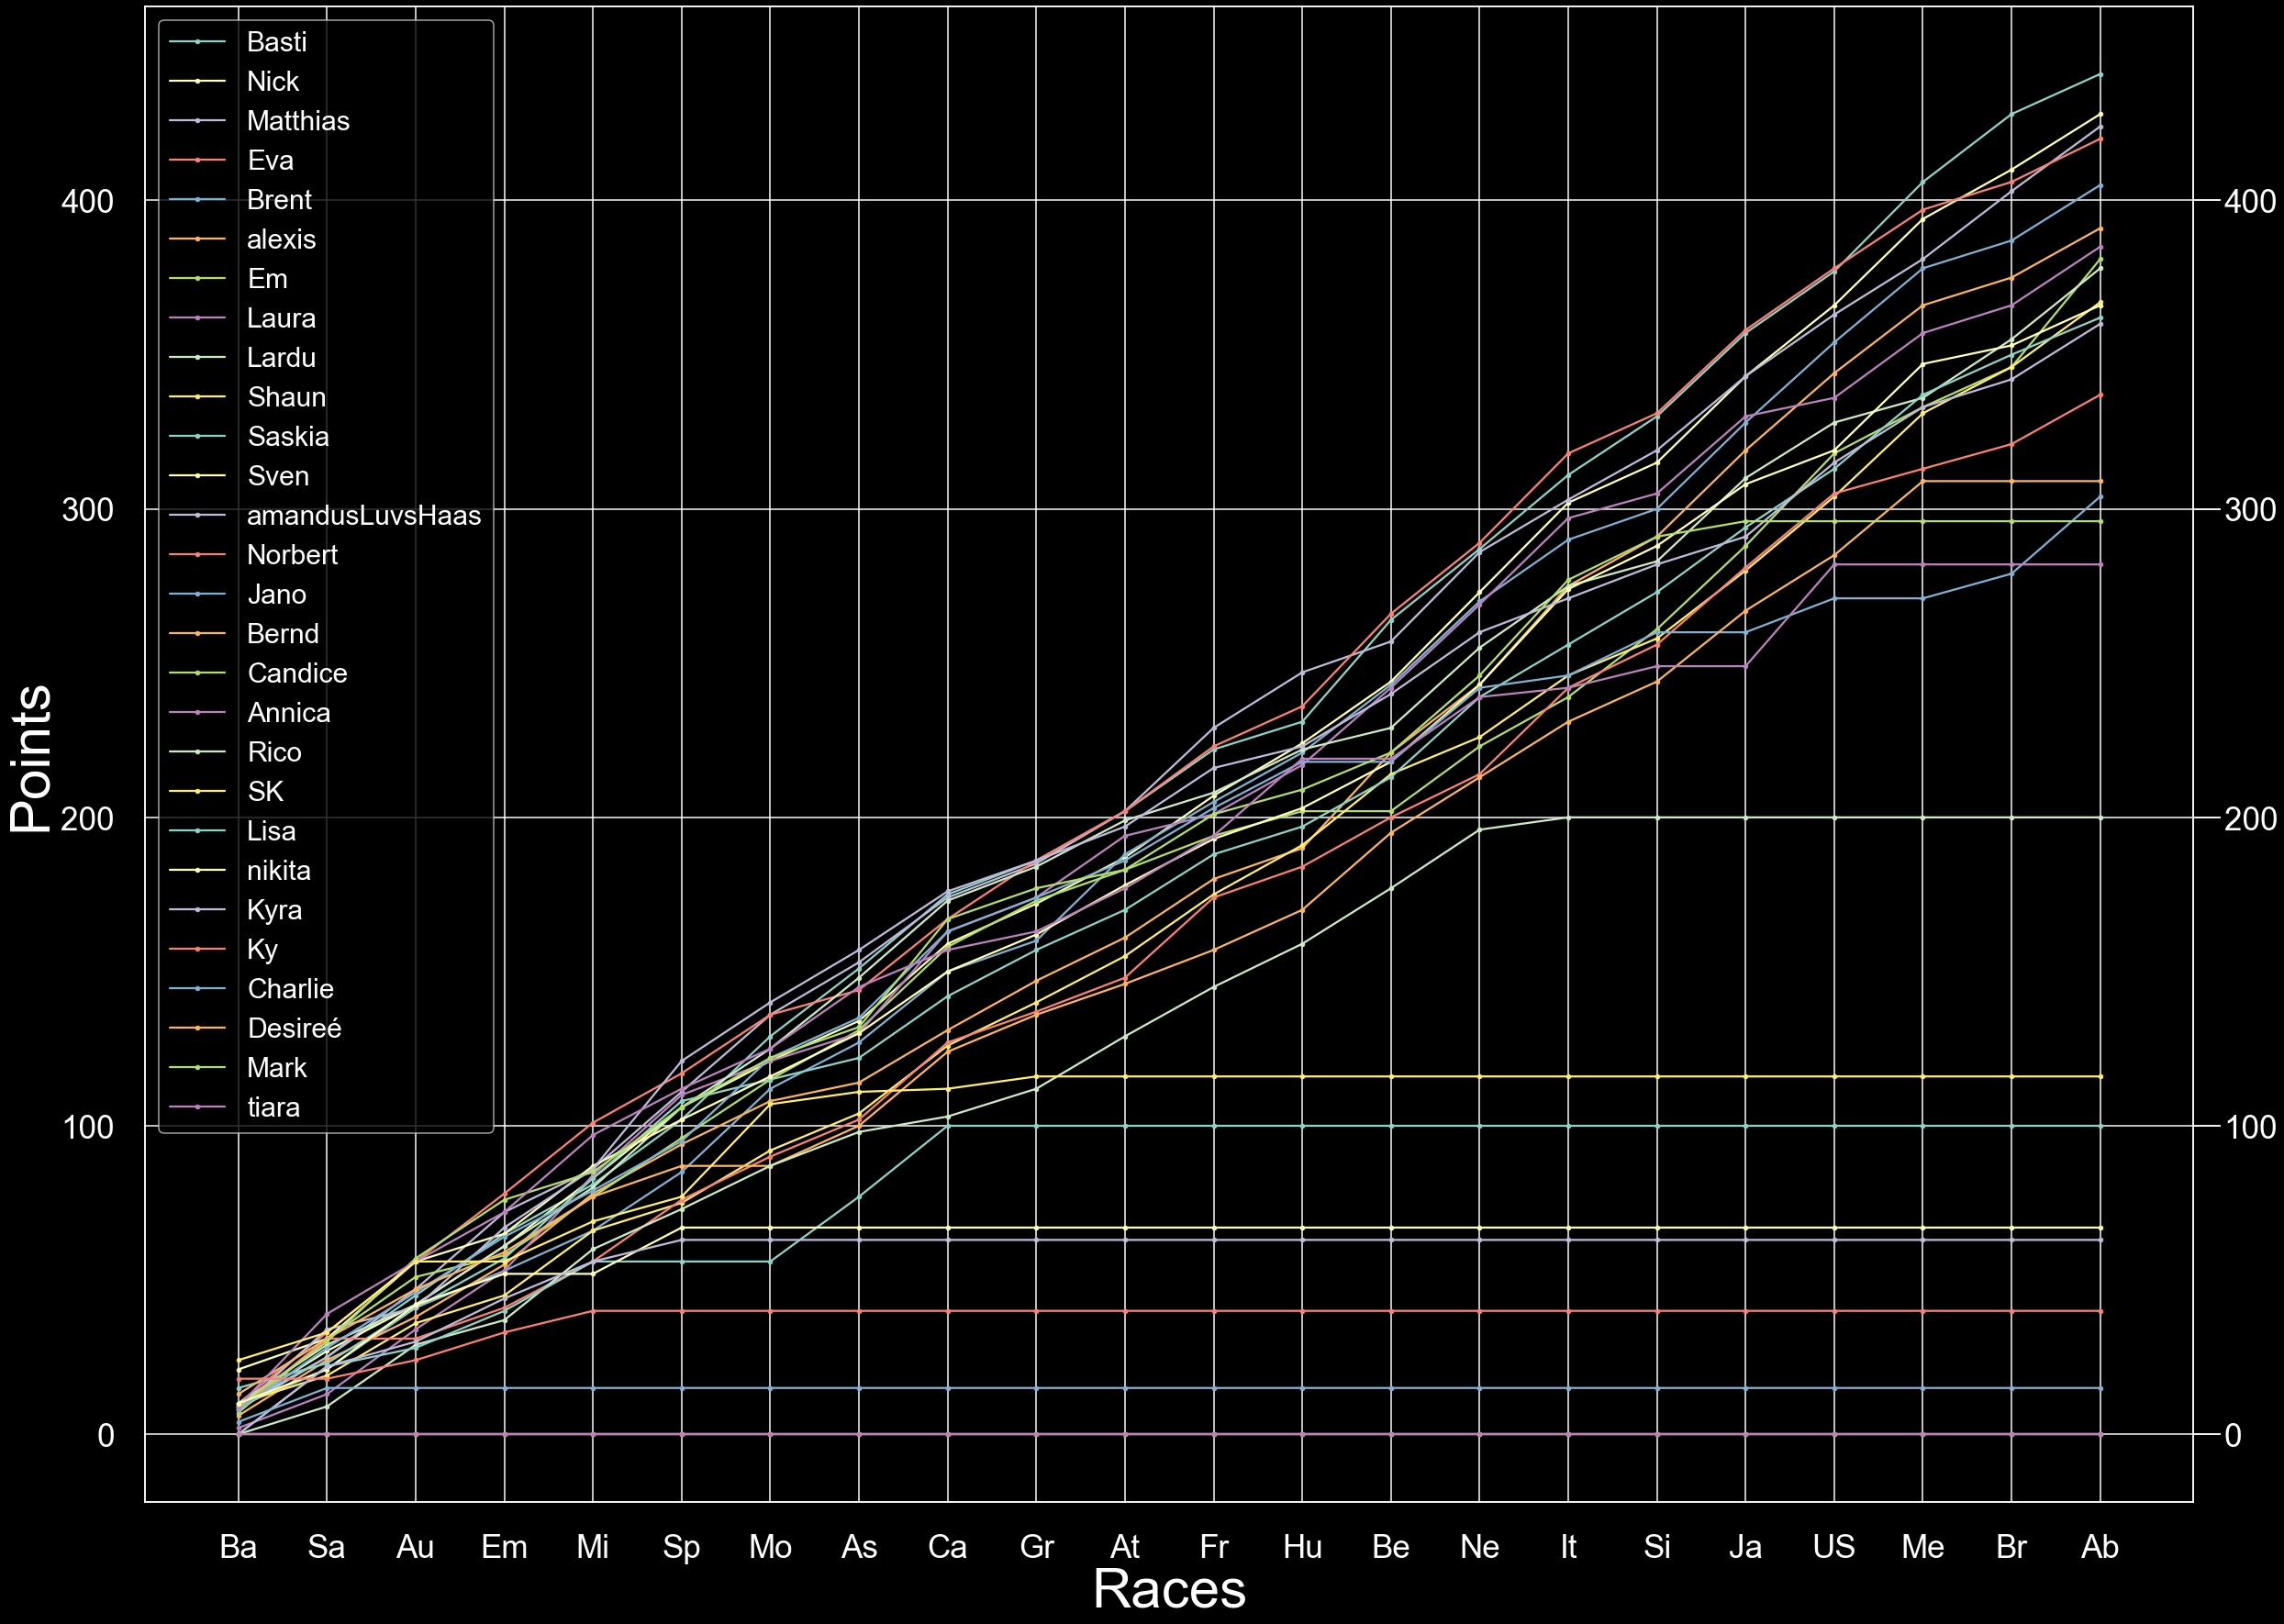

In [45]:
sb.set_theme(palette = "bright", context = "talk")
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (40,30)
for name in nameList:
    plt.plot(races,scoreList(name), label = name, marker = '.')  
plt.legend(fontsize = 30)
plt.xlabel('Races' , size = 60)
plt.ylabel('Points', size = 60)
plt.tick_params(labelright=True, right = True, length = 30, labelsize = 35)
plt.show()


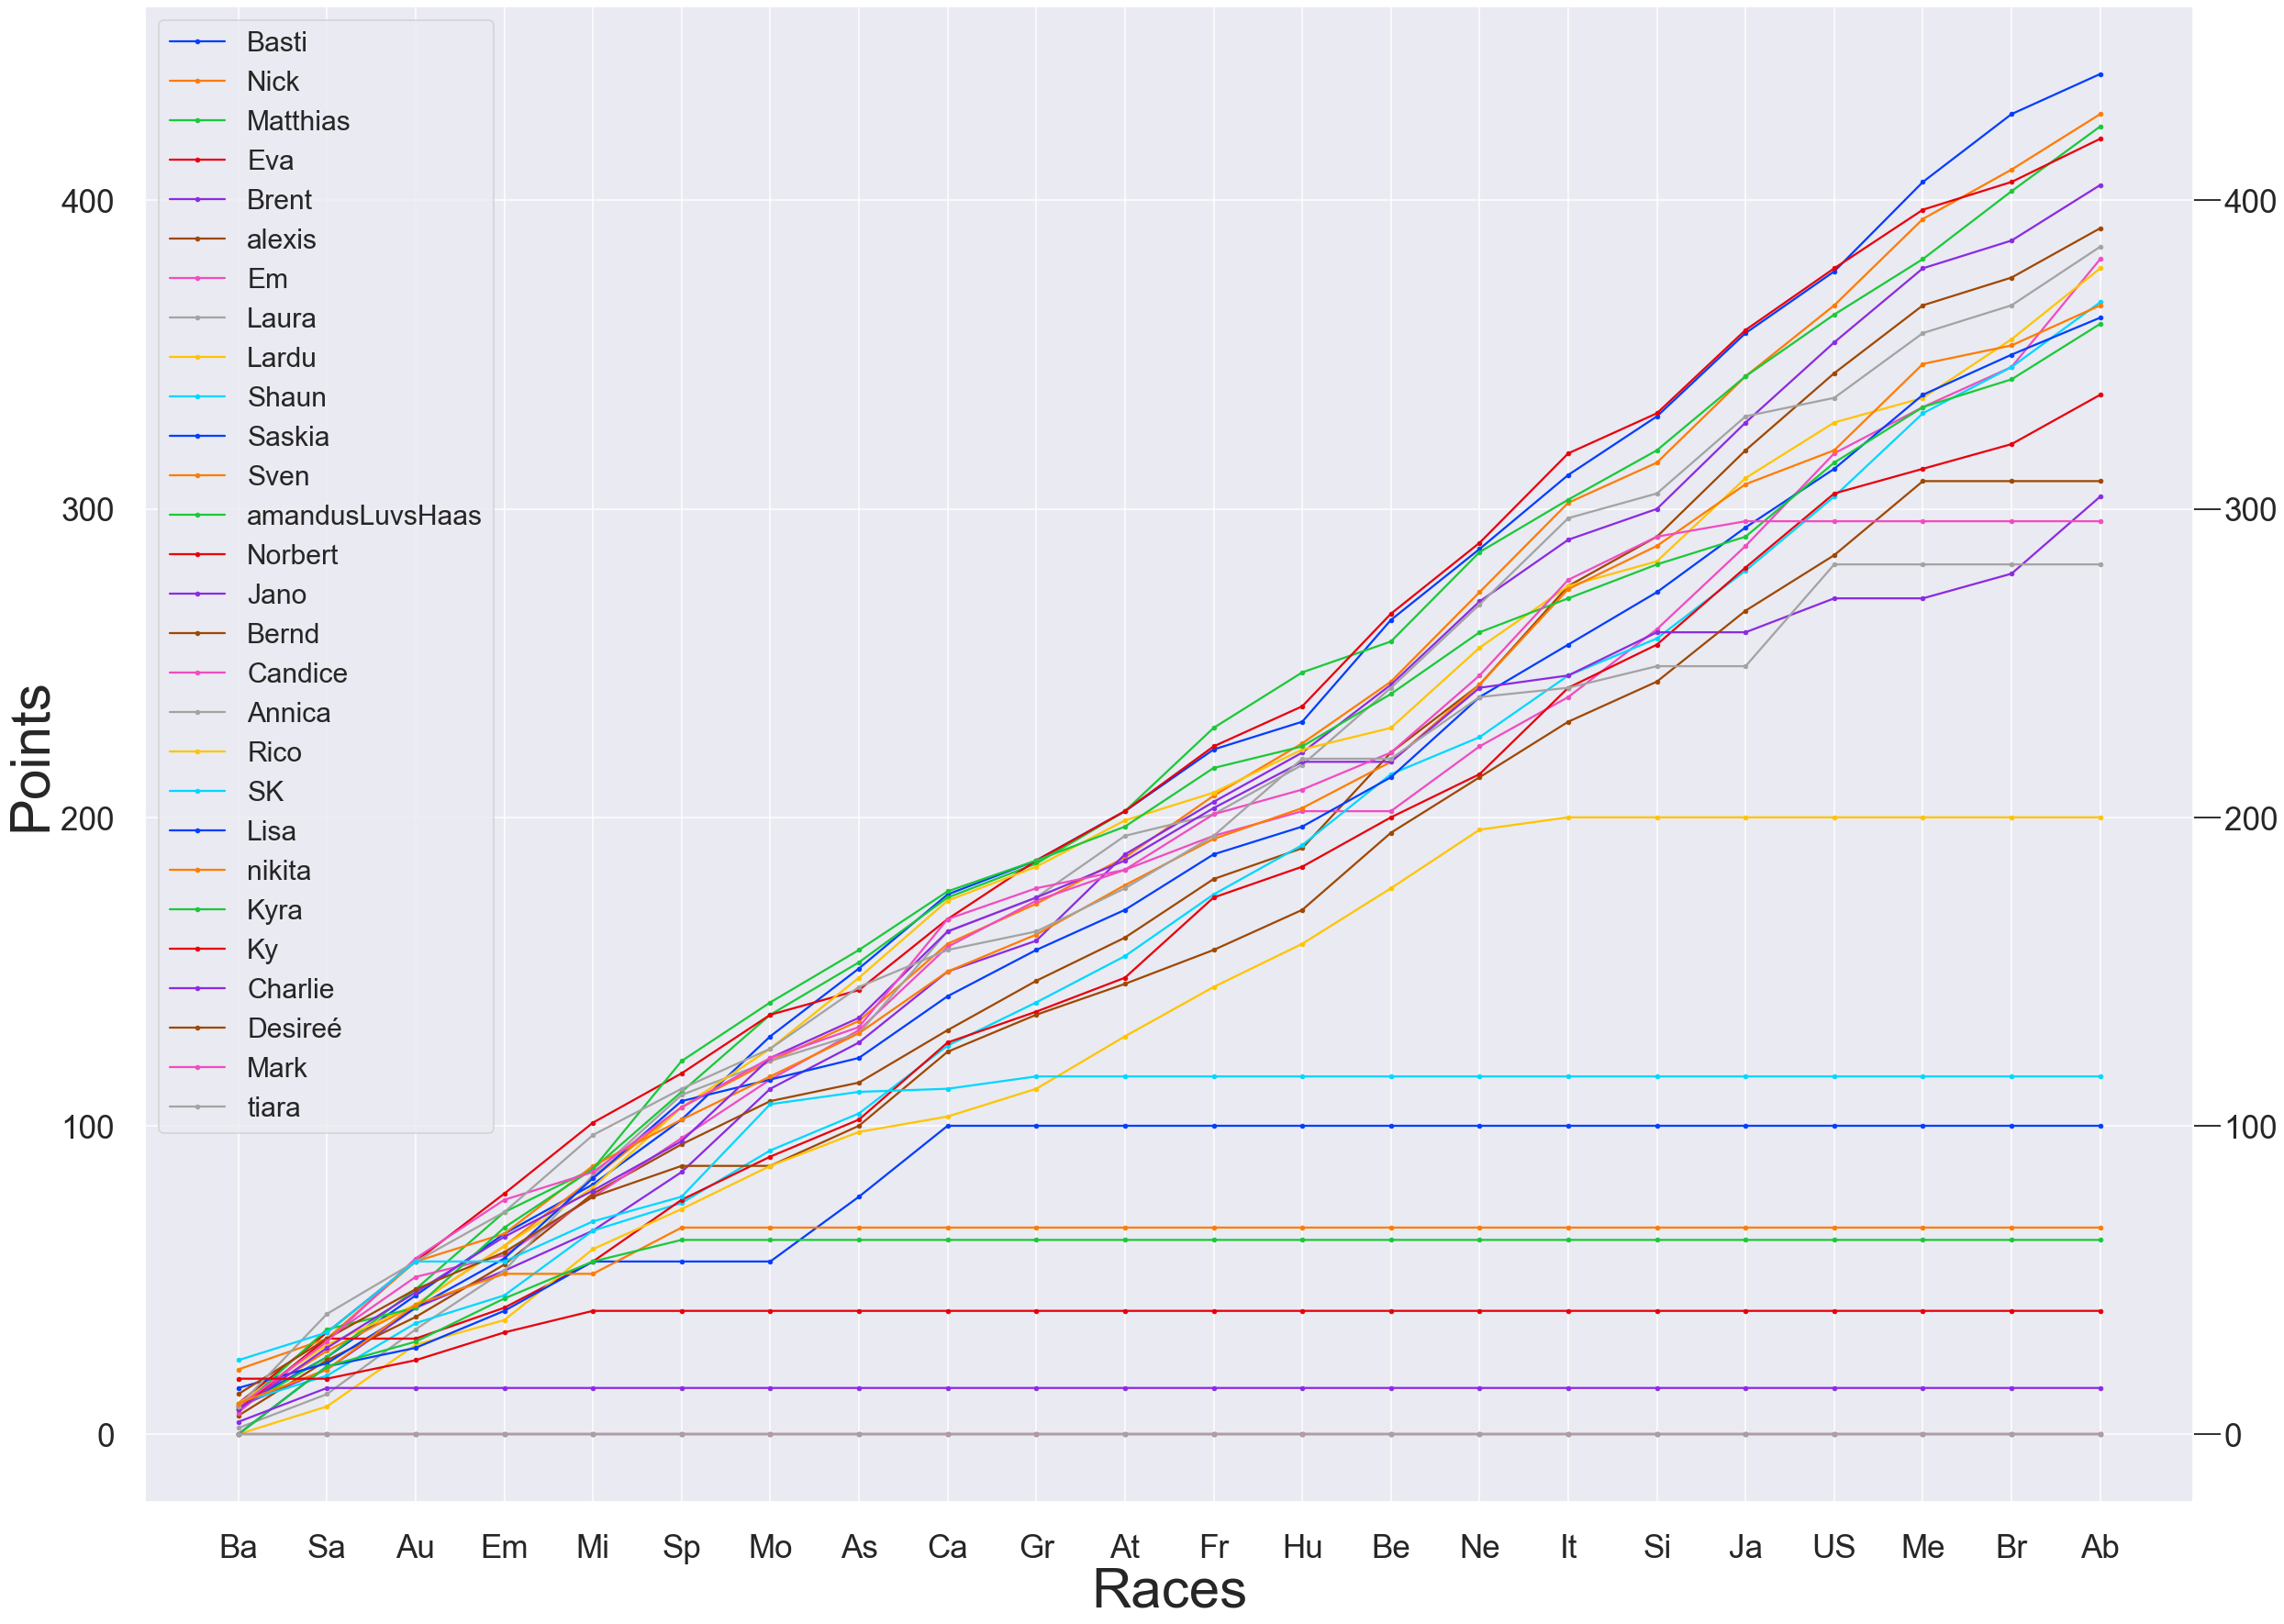

In [46]:
sb.set_theme(palette = "bright", context = "talk")
plt.rcParams["figure.figsize"] = (40,30)
for name in nameList:
    plt.plot(races,scoreList(name), label = name, marker = '.')  
plt.legend(fontsize = 30)
plt.xlabel('Races' , size = 60)
plt.ylabel('Points', size = 60)
plt.tick_params(labelright=True, right = True, length = 30, labelsize = 35)
plt.show()

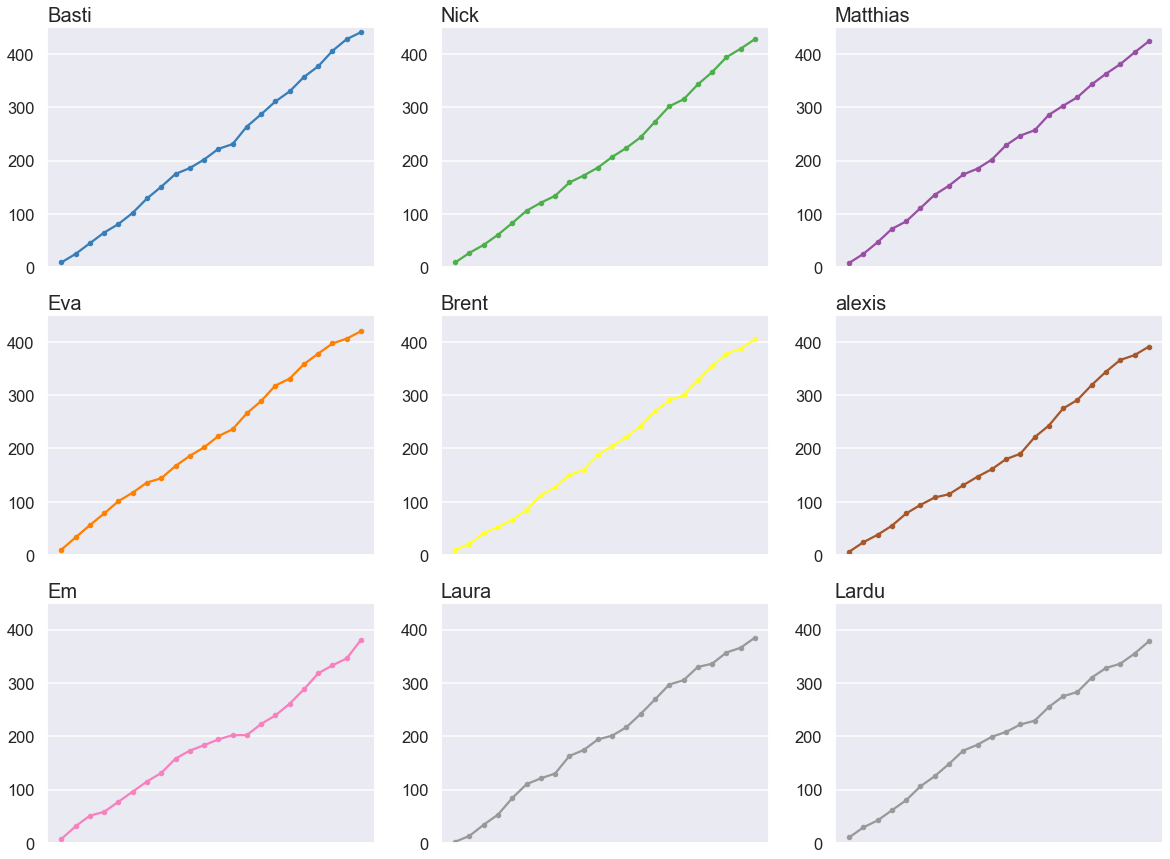

In [47]:
sb.set_theme(palette = "bright", context = "talk")
plt.rcParams["figure.figsize"] = (20,15)

palette = plt.get_cmap('Set1')

num=0
for name in nameList:
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(3,3, num)
    plt.xticks([])
    # Plot the lineplot
    plt.plot(races,scoreList(name), label = name, marker = '.',color=palette(num))
 
    # Same limits for every chart
    plt.xlim(-1,22)
    plt.ylim(0,450)
 
    # Not ticks everywhere
    if num in range(7) :
        plt.tick_params(labelbottom='off')
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off')
 
    # Add title
    plt.title(name, loc='left', fontsize=20, fontweight=0)
    
    if num == 9:
        break



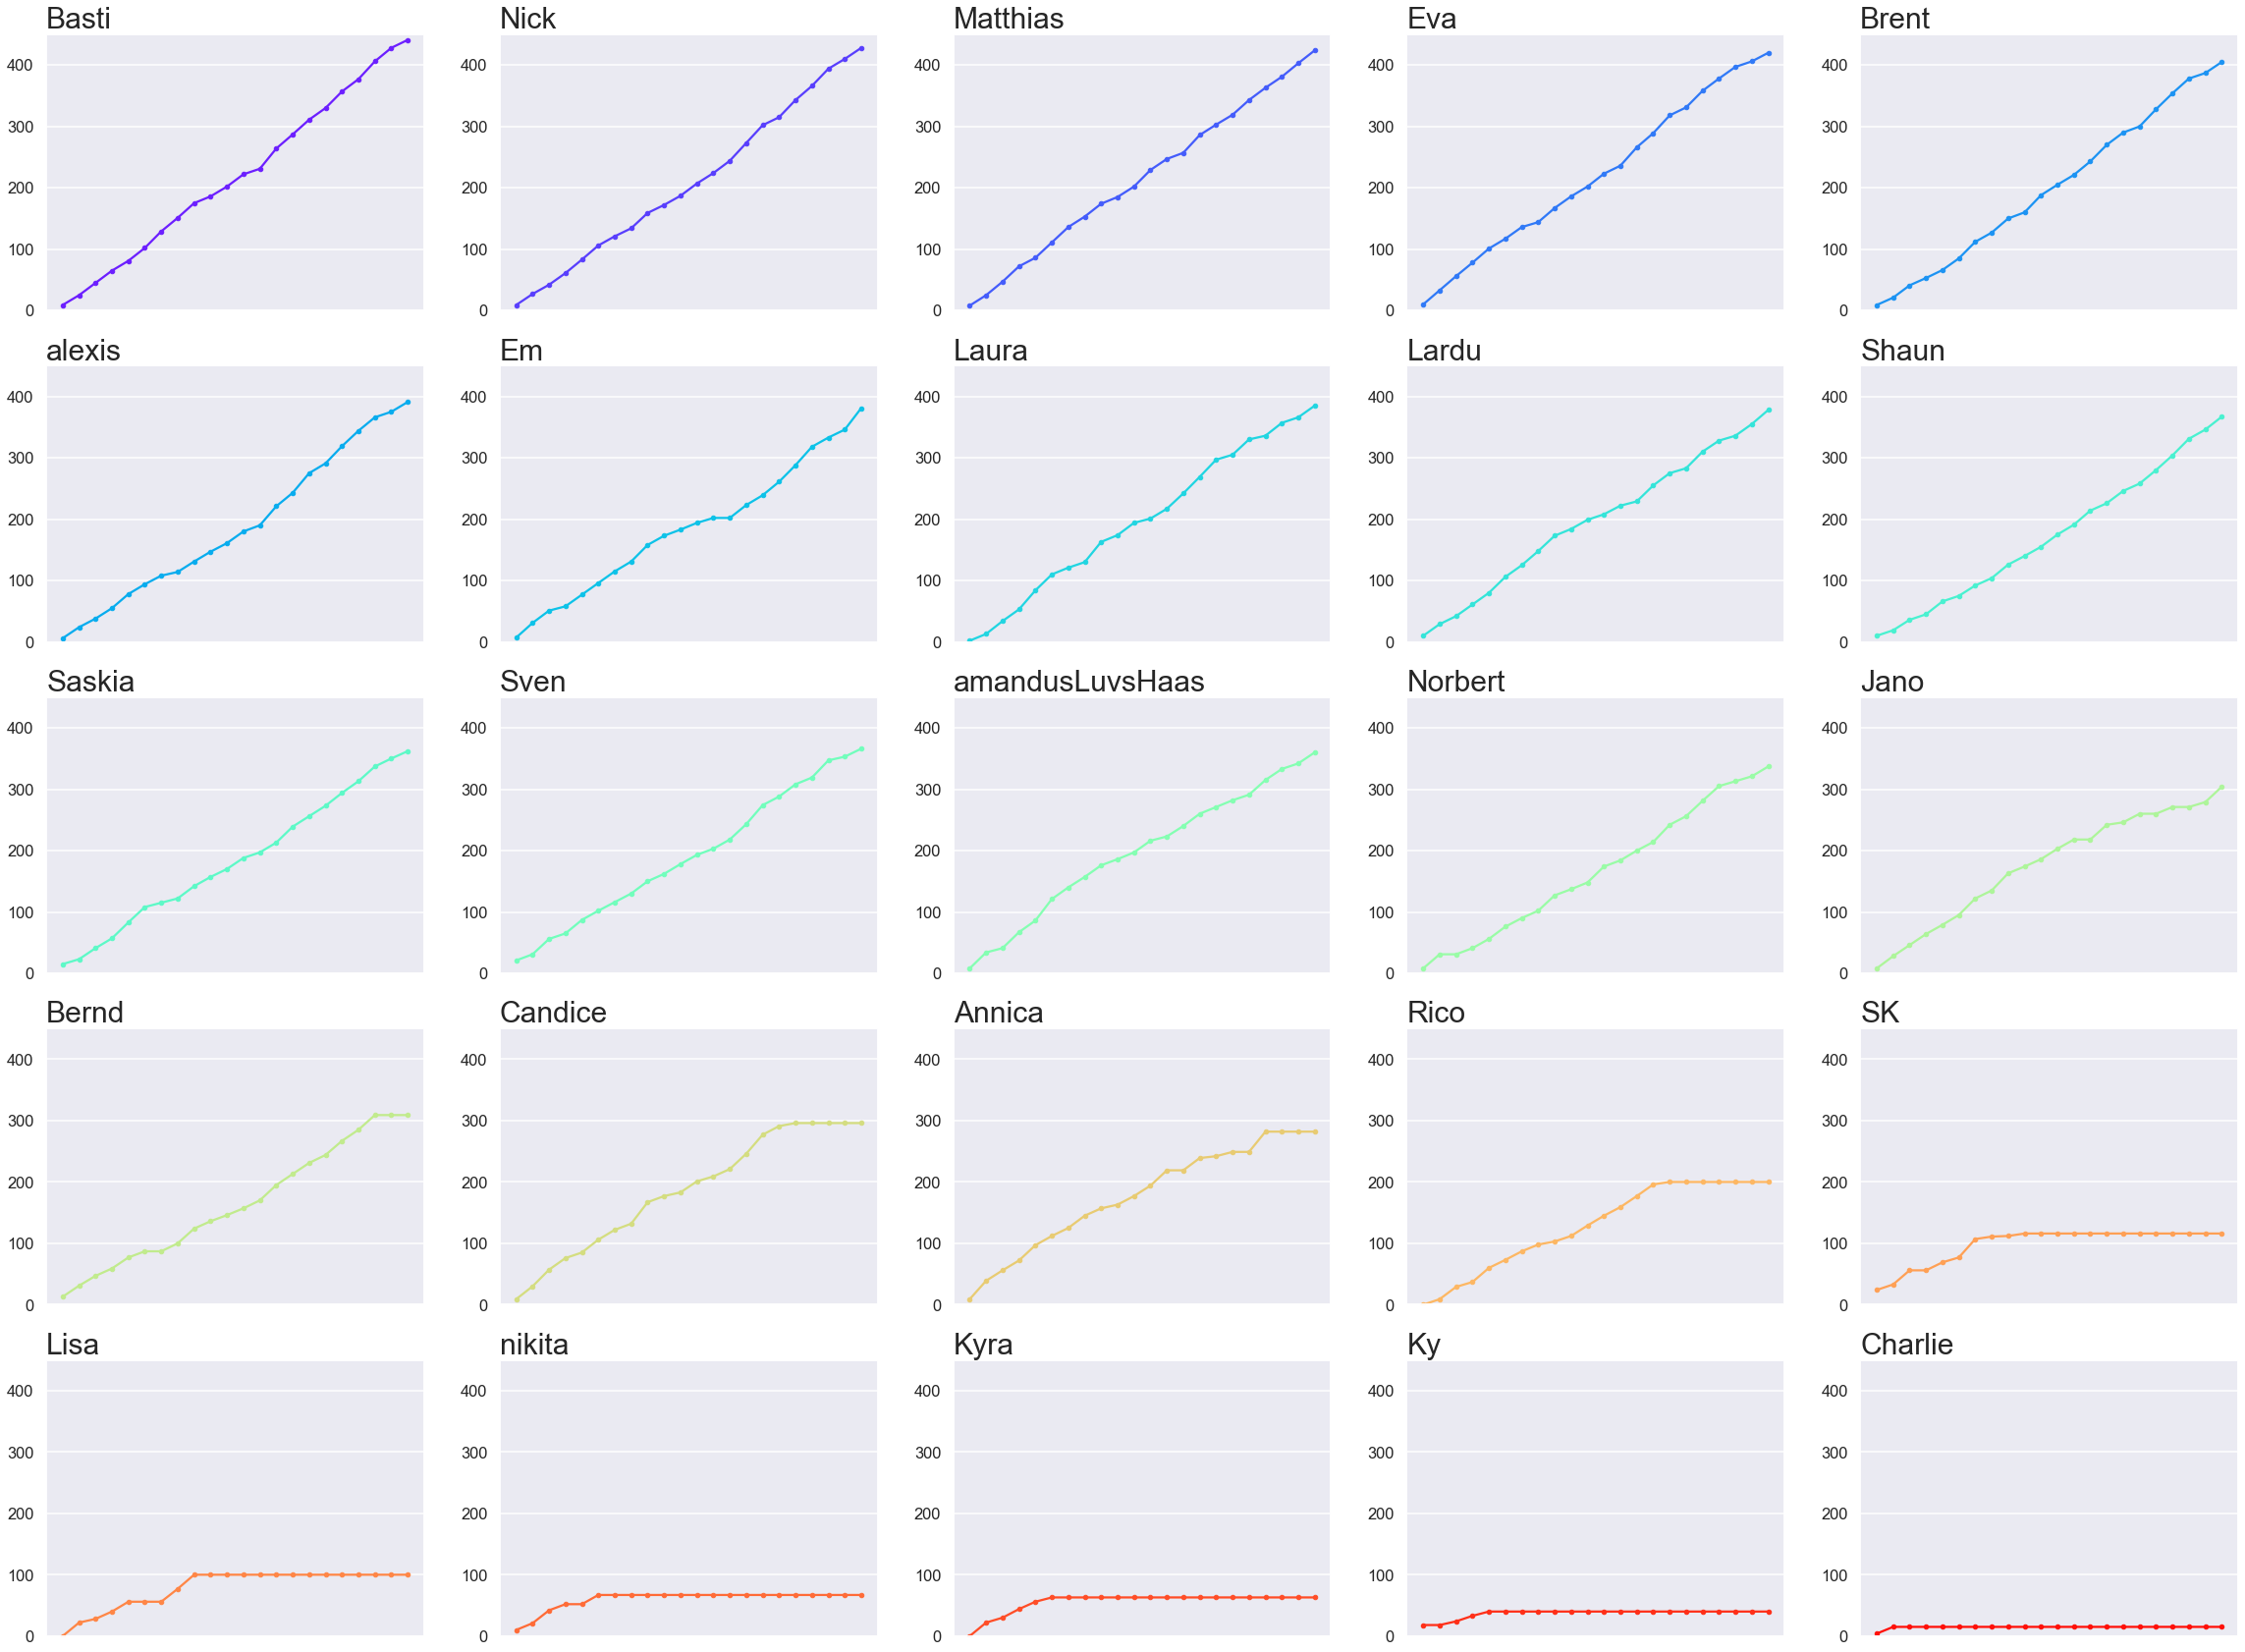

In [48]:
sb.set_theme(palette = "bright", context = "talk")
plt.rcParams["figure.figsize"] = (40,30)

palette = plt.get_cmap('rainbow')

num=0
colour = 0
for name in nameList:
    num+=1
    colour+=10
 
    # Find the right spot on the plot
    plt.subplot(5,5, num)
    plt.xticks([])
    # Plot the lineplot
    plt.plot(races,scoreList(name), label = name, marker = '.',color=palette(colour))
 
    # Same limits for every chart
    plt.xlim(-1,22)
    plt.ylim(0,450)
 
    # Not ticks everywhere
    if num in range(7) :
        plt.tick_params(labelbottom='off')
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off')
 
    # Add title
    plt.title(name, loc='left', fontsize=30, fontweight=0)
    
    if num == 25:
        break


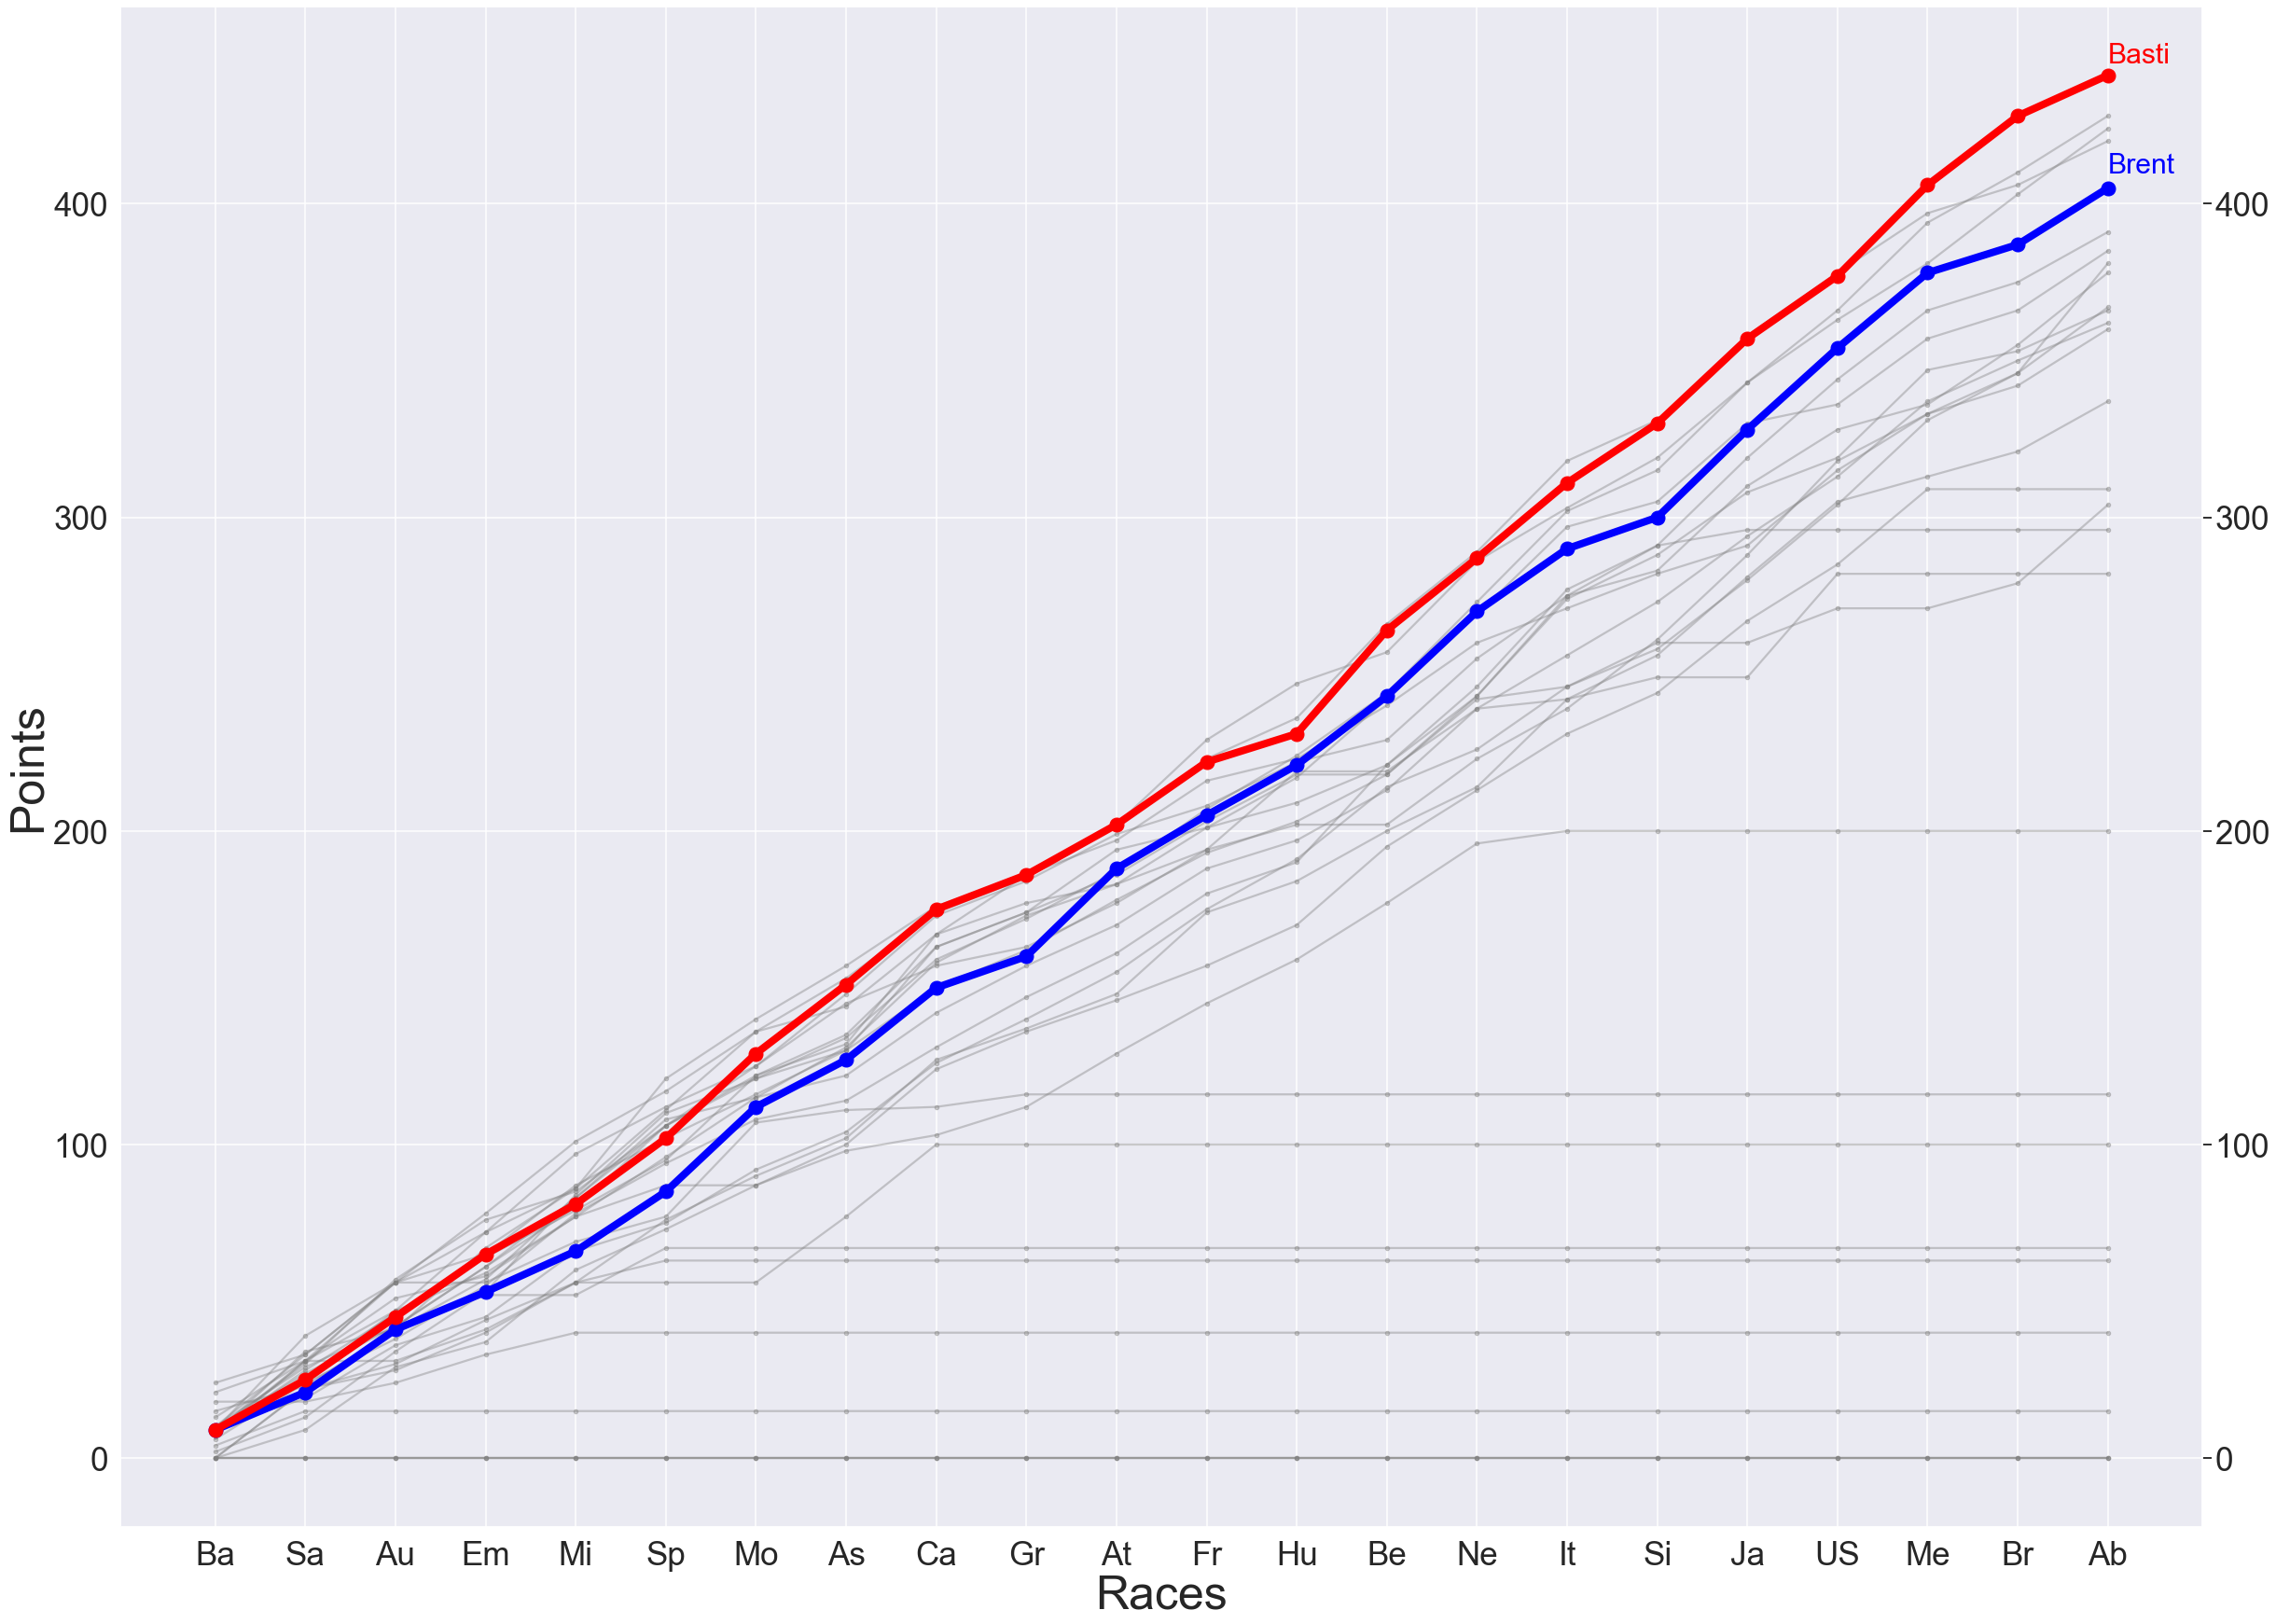

In [56]:
sb.set_theme(palette = "bright", context = "talk")
plt.rcParams["figure.figsize"] = (40,30)
for name in nameList:
    plt.plot(races,scoreList(name), label = name, marker = '.', color = 'grey', alpha = 0.4)  

plt.plot(races,scoreList('Brent'), label = name, marker = '.', markersize = 30, color = 'blue', alpha = 1, linewidth = 8) 
plt.plot(races,scoreList("Basti"), label = name, marker = '.', markersize = 30, color = 'red', alpha = 1, linewidth = 8) 

plt.text('Ab', 410, 'Brent', horizontalalignment='left', size=30, color='blue')
plt.text('Ab', 445, 'Basti', horizontalalignment='left', size=30, color='red')

plt.xlabel('Races' , size = 50)
plt.ylabel('Points', size = 50)
plt.tick_params(labelright=True, right = True, length = 10, labelsize = 35)
plt.show()